In [29]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from math import cos, sin, asin, sqrt, pi
import numpy as np

In [30]:
train_df =  pd.read_csv('train.csv', nrows = 300_000)

In [31]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,300000.000000,300000.000000,300000.000000,299998.000000,299998.000000,300000.000000
mean,11.359876,-72.523230,39.928171,-72.529448,39.927360,1.684403
std,9.932815,11.325144,8.953498,10.914682,6.546706,1.309132
min,-44.900000,-740.000000,-3116.285383,-1329.621332,-1189.615440,0.000000
25%,6.000000,-73.992050,40.734985,-73.991350,40.734059,1.000000
50%,8.500000,-73.981762,40.752737,-73.980116,40.753185,1.000000
75%,12.500000,-73.967097,40.767108,-73.963565,40.768095,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [33]:
# Drop NAs 
print('Before: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('After: %d' % len(train_df))

Before: 300000
After: 299998


In [34]:
train_df.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [35]:
# Need to coerce pickup_datetime to a datetime object to help with feature creation 
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [36]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,299998.000000,299998.000000,299998.000000,299998.000000,299998.000000,299998.000000
mean,11.359621,-72.523220,39.928166,-72.529448,39.927360,1.684415
std,9.931901,11.325181,8.953528,10.914682,6.546706,1.309130
min,-44.900000,-740.000000,-3116.285383,-1329.621332,-1189.615440,0.000000
25%,6.000000,-73.992050,40.734985,-73.991350,40.734059,1.000000
50%,8.500000,-73.981762,40.752737,-73.980116,40.753185,1.000000
75%,12.500000,-73.967096,40.767109,-73.963565,40.768095,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


Right off the bat we see some problems with this dataset. Even after removal of NA's there are: 
1. Negative cab fares
2. lat/longs of 2500+ (latitude ranges from 0 to 90, longitude from 0 to 180)
3. Cab rides with 0 passengers 
4. Clown cars with 208 passengers 

In [37]:
print('Before: %d' % len(train_df))
train_df = train_df[train_df.fare_amount > 2.5]
train_df = train_df.loc[train_df['passenger_count'].between(1, 6)]
train_df = train_df.loc[train_df['pickup_longitude'].between(-74.2, -73.3)]
train_df = train_df.loc[train_df['dropoff_longitude'].between(-74.2, -73.3)]
train_df = train_df.loc[train_df['dropoff_latitude'].between(40.6, 40.9)]
train_df = train_df.loc[train_df['pickup_latitude'].between(40.6, 40.9)]
print('After: %d' % len(train_df))



Before: 299998
After: 291029


In [38]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000
mean,11.316799,-73.975498,40.750922,-73.974408,40.751354,1.691797
std,9.538191,0.034461,0.026633,0.034536,0.030240,1.308263
min,2.510000,-74.199685,40.600037,-74.198678,40.600014,1.000000
25%,6.000000,-73.992268,40.736653,-73.991532,40.735693,1.000000
50%,8.500000,-73.982068,40.753482,-73.980583,40.753933,1.000000
75%,12.500000,-73.968412,40.767507,-73.965381,40.768375,2.000000
max,500.000000,-73.307595,40.898517,-73.329048,40.900000,6.000000


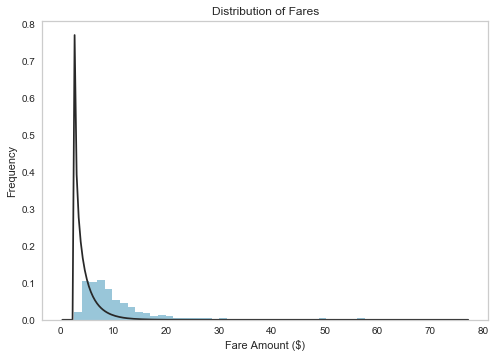

In [91]:
sns.distplot(train_df.fare_amount[train_df.fare_amount <= 75], kde=False, fit=stats.gamma)
plt.rcParams['axes.facecolor']='white'
plt.grid(b=None)
plt.title('Distribution of Fares')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

The distribution of fares is heavily right skewed with the vast majority of trips costing less than $20. 

/Users/Eric/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


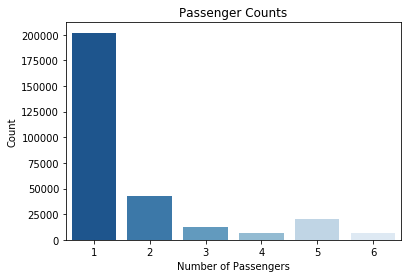

In [40]:
sns.countplot(x = 'passenger_count', data = train_df, palette = 'Blues_r')

plt.rcParams['axes.facecolor']='white'
rcParams['figure.figsize'] = (6, 4) 

plt.xlabel("Number of Passengers")
plt.ylabel("Count")
plt.title("Passenger Counts")

plt.show()

Most trips have just 1 passenger

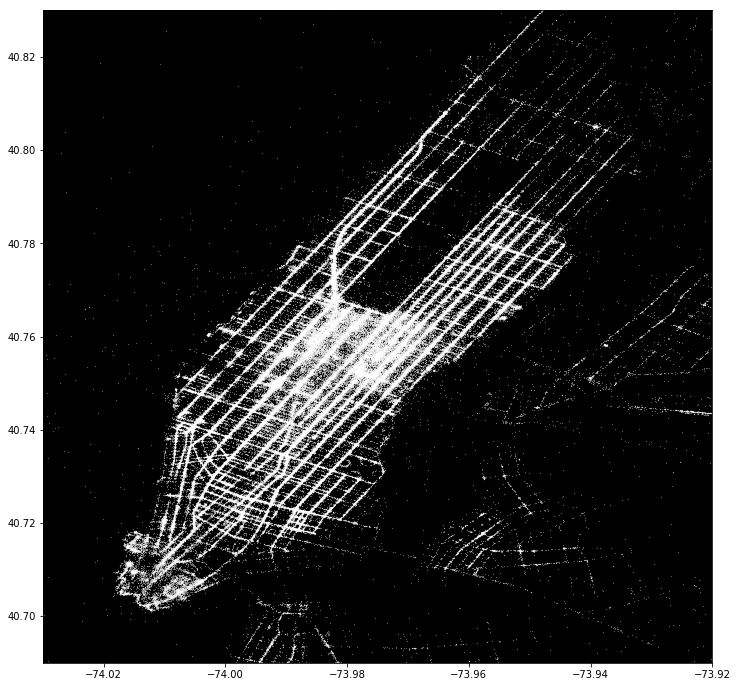

In [65]:
# Plot Parameters
rcParams['figure.figsize'] = (12, 12) 
plt.rcParams['axes.facecolor']='black'

# Ploting Data
ax = plt.scatter(x=train_df["pickup_longitude"], 
                 y=train_df["pickup_latitude"], 
                 s=.02, 
                 color = 'white')

# Set axes range
plt.xlim(-74.03, -73.92)
plt.ylim(40.69, 40.83)

# Show
plt.show()

In [42]:
# Date and time feature creation

train_df['year'] = train_df['pickup_datetime'].dt.year
train_df['month'] = train_df['pickup_datetime'].dt.month
train_df['day'] = train_df['pickup_datetime'].dt.day
train_df['hour'] = train_df['pickup_datetime'].dt.hour

train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7


In [43]:
# Distance 
def euclidian_distance(x1, x2, y1, y2):
    dist = ((x2 - x1)**2 + (y2 - y1) ** 2) ** .5
    return(dist)
    
def manhattan_distance(x1, x2, y1, y2):
    dist = abs(x2 - x1) + abs(y2 - y1)
    return(dist)

season_dict = {
    12:'Winter',
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
}

# Lat / lon of city center and JFK 
jfk = {'lon': -73.78, 'lat': 40.64}
nyc = {'lon': -74.00, 'lat': 40.71}
ewr = {'lon': -74.175, 'lat': 40.69}
lga = {'lon': -73.87, 'lat': 40.77}


def haversine_distance(lat1, lat2, lon1, lon2):
    # Radius of earth in miles
    r = 3956 
    
    # convert lat/lon to radians
    lon1 = lon1 * (pi / 180)
    lat1 = lat1 * (pi / 180)
    lon2 = lon2 * (pi / 180)
    lat2 = lat2 * (pi / 180)

    # Get distances between lat/lons
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    
    # Formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    dist = 2 * r * asin(sqrt(a)) 
    
    return dist


In [44]:
train_df['euclidian_dist'] = euclidian_distance(  train_df['dropoff_latitude']
                                              , train_df['pickup_latitude']
                                              , train_df['dropoff_longitude']
                                              , train_df['pickup_longitude'])

train_df['manhattan_dist'] = manhattan_distance(  train_df['dropoff_latitude']
                                              , train_df['pickup_latitude']
                                              , train_df['dropoff_longitude']
                                              , train_df['pickup_longitude'])

train_df['haversine_dist'] = train_df.apply(lambda row: haversine_distance(
                                                row['dropoff_latitude']
                                              , row['pickup_latitude']
                                              , row['dropoff_longitude']
                                              , row['pickup_longitude']),
                                            axis = 1)

train_df['season'] = train_df['month'].map(season_dict)

In [47]:
pickup_to_center = train_df.apply(lambda row: haversine_distance(
                                                nyc['lat']
                                              , row['pickup_latitude']
                                              , nyc['lon']
                                              , row['pickup_longitude']),
                                            axis = 1)

dropoff_to_center = train_df.apply(lambda row: haversine_distance(
                                                nyc['lat']
                                              , row['dropoff_latitude']
                                              , nyc['lon']
                                              , row['dropoff_longitude']),
                                            axis = 1)

pickup_to_jfk = train_df.apply(lambda row: haversine_distance(
                                                jfk['lat']
                                              , row['pickup_latitude']
                                              , jfk['lon']
                                              , row['pickup_longitude']),
                                            axis = 1)

dropoff_to_jfk = train_df.apply(lambda row: haversine_distance(
                                                jfk['lat']
                                              , row['dropoff_latitude']
                                              , jfk['lon']
                                              , row['dropoff_longitude']),
                                            axis = 1)

pickup_to_ewr = train_df.apply(lambda row: haversine_distance(
                                                ewr['lat']
                                              , row['pickup_latitude']
                                              , ewr['lon']
                                              , row['pickup_longitude']),
                                            axis = 1)

dropoff_to_ewr = train_df.apply(lambda row: haversine_distance(
                                                ewr['lat']
                                              , row['dropoff_latitude']
                                              , ewr['lon']
                                              , row['dropoff_longitude']),
                                            axis = 1)

pickup_to_lga = train_df.apply(lambda row: haversine_distance(
                                                lga['lat']
                                              , row['pickup_latitude']
                                              , lga['lon']
                                              , row['pickup_longitude']),
                                            axis = 1)

dropoff_to_lga = train_df.apply(lambda row: haversine_distance(
                                                lga['lat']
                                              , row['dropoff_latitude']
                                              , lga['lon']
                                              , row['dropoff_longitude']),
                                            axis = 1)



In [48]:
train_df['center_dist'] = [min(x) for x in zip(pickup_to_center, dropoff_to_center)]
train_df['jfk_dist'] = [min(x) for x in zip(pickup_to_jfk, dropoff_to_jfk)]
train_df['ewr_dist'] = [min(x) for x in zip(pickup_to_ewr, dropoff_to_ewr)]
train_df['lga_dist'] = [min(x) for x in zip(pickup_to_lga, dropoff_to_lga)]

In [49]:
print('Before: %d' % len(train_df))
#train_df = train_df[train_df.haversine_dist != 0]
train_df = train_df.loc[train_df['passenger_count'].between(.000001, 15)]
print('After: %d' % len(train_df))

Before: 291029
After: 291029


In [18]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,euclidian_dist,manhattan_dist,haversine_dist,season,center_dist,jfk_dist,ewr_dist,lga_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0.009436,0.011742,0.640041,Summer,8.185106,5.942452,17.443175,3.619856
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,0.079696,0.107481,5.247014,Winter,0.844712,13.304923,8.449358,5.772969
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,0.013674,0.019212,0.862810,Summer,2.837853,13.437328,10.485809,5.926248
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,0.025340,0.029386,1.738175,Spring,1.734038,12.608024,10.273772,6.410315
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,0.019470,0.027194,1.241354,Spring,4.339049,13.230530,12.091673,4.629331


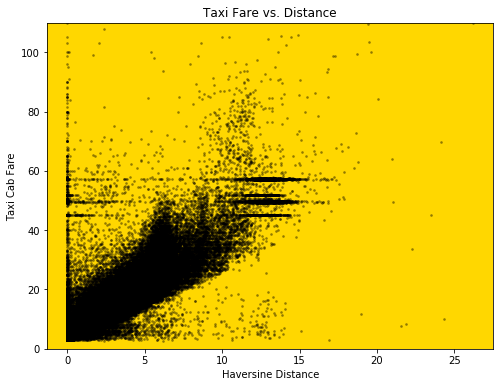

In [56]:
rcParams['figure.figsize'] = (8, 6) 

plt.scatter(train_df['haversine_dist'], train_df['fare_amount'], alpha=0.3, color='black', s=3)
plt.rcParams['axes.facecolor']='gold'

plt.title('Taxi Fare vs. Distance')
plt.xlabel('Haversine Distance')
plt.ylabel('Taxi Cab Fare')

plt.ylim(0,110)


plt.show()

There are a lot of fixed price rides no matter what the distance is, these are presumably airports and might make a good feature in the model 

In [59]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
euclidian_dist       0
manhattan_dist       0
haversine_dist       0
season               0
center_dist          0
jfk_dist             0
ewr_dist             0
lga_dist             0
dtype: int64

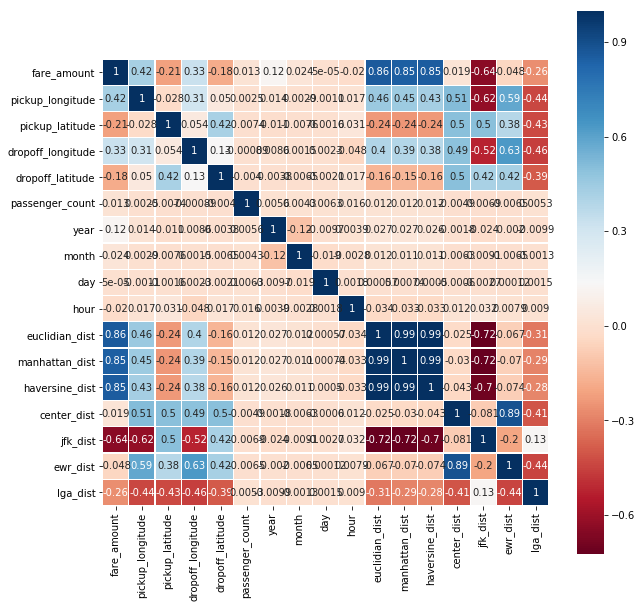

In [60]:
corrs = train_df.corr()

plt.rcParams['axes.facecolor']='white'

plt.figure(figsize = (10, 10))
sns.heatmap(corrs, linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, 
            linecolor='white', annot=True)

plt.show()

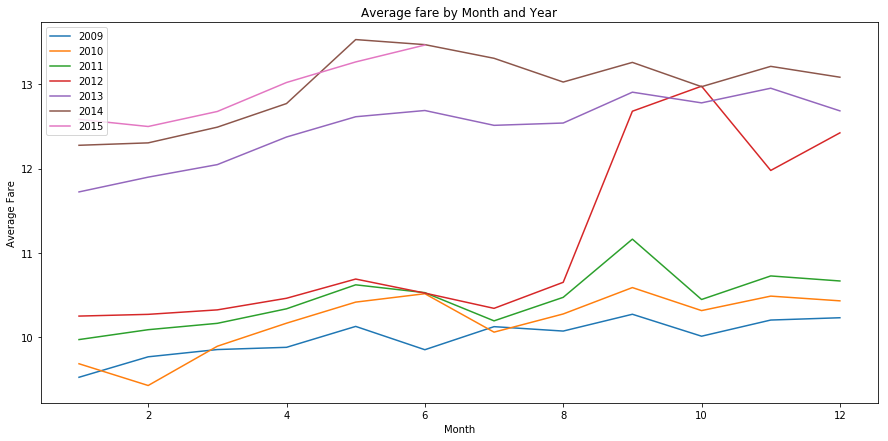

In [61]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
train_df.groupby(['month', 'year']).mean()['fare_amount'].unstack().plot(ax=ax)

plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.title('Average fare by Month and Year')
plt.legend(loc="upper left")

plt.show()

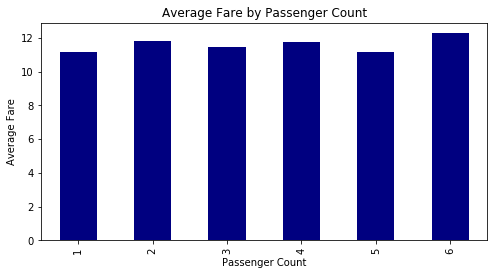

In [63]:
fig, ax = plt.subplots(figsize=(8,4))

train_df.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'navy')
plt.title('Average Fare by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare')
plt.rcParams['axes.facecolor']='white'


plt.show()

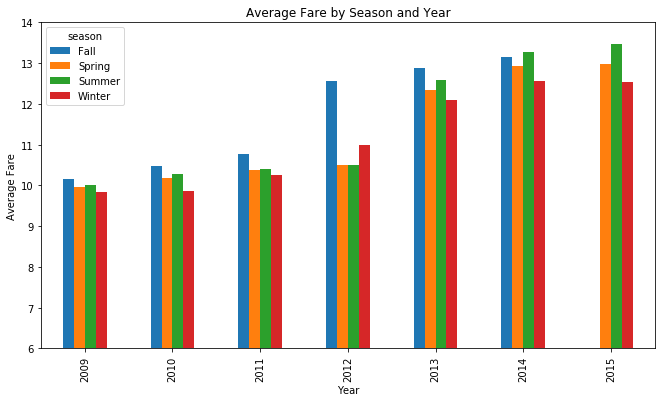

In [75]:
fig, ax = plt.subplots(figsize=(11,6))

train_df.groupby(['year', 'season'])['fare_amount'].mean().unstack().plot.bar(ax=ax)
plt.title('Average Fare by Season and Year')
plt.ylabel('Average Fare')
plt.xlabel('Year')
plt.ylim(6, 14)
plt.rcParams['axes.facecolor']='white'


plt.show()

Wow you can so clearly see the %17 taxi rate hike of September 2012, crazy to see. Other than that I don't see much of a seasonal trend from month to month, but the price does appear to slowly rise over the years. 

# Feature Importance

Great article for feature selection: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Feature selection is important because it reduces overfitting in sample, improves out of sample accuracy, and also reduces the actual time it takes to train a model. The two I want to try that were mentioned in this article are univariate selection and feature imporance. 

Univariate selection uses statistical tests to find single features are the the most related to the variable you are trying to predict. On the other hand, feature importances 

Statistical tests can be used to select those features that have the strongest relationship with the output variable.


In [76]:
train_df.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
day                           int64
hour                          int64
euclidian_dist              float64
manhattan_dist              float64
haversine_dist              float64
season                       object
center_dist                 float64
jfk_dist                    float64
ewr_dist                    float64
lga_dist                    float64
dtype: object

In [77]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,euclidian_dist,manhattan_dist,haversine_dist,center_dist,jfk_dist,ewr_dist,lga_dist
count,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000,291029.000000
mean,11.316799,-73.975498,40.750922,-73.974408,40.751354,1.691797,2011.742579,6.275938,15.672070,13.514217,0.033924,0.043865,2.054790,2.767656,12.433488,10.698446,5.475366
std,9.538191,0.034461,0.026633,0.034536,0.030240,1.308263,1.865813,3.442217,8.673976,6.504705,0.037928,0.049337,2.188397,1.608297,2.084217,1.477983,1.444514
min,2.510000,-74.199685,40.600037,-74.198678,40.600014,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.028910,0.215899,0.133028,0.012899
25%,6.000000,-73.992268,40.736653,-73.991532,40.735693,1.000000,2010.000000,3.000000,8.000000,9.000000,0.012892,0.016479,0.784427,1.529478,12.508791,9.737920,4.810156
50%,8.500000,-73.982068,40.753482,-73.980583,40.753933,1.000000,2012.000000,6.000000,16.000000,14.000000,0.021898,0.028239,1.342519,2.676032,12.862887,10.519982,5.647657
75%,12.500000,-73.968412,40.767507,-73.965381,40.768375,2.000000,2013.000000,9.000000,23.000000,19.000000,0.038788,0.050877,2.434146,3.708517,13.217426,11.441197,6.291131
max,500.000000,-73.307595,40.898517,-73.329048,40.900000,6.000000,2015.000000,12.000000,31.000000,23.000000,0.498474,0.557147,26.213155,35.565439,26.427237,44.499541,29.914351


In [78]:
from sklearn.feature_selection import SelectKBest, f_classif

# Prep Data
X = train_df.drop(['fare_amount', 'pickup_datetime', 'key'], axis=1)
X = pd.get_dummies(X, columns = ['season'])

# # Reset their indexes
# X.reset_index(drop=True, inplace=True)
# dummies.reset_index(drop=True, inplace=True)

# # Join them 
# X = pd.concat([X, dummies], axis = 1)

# Independent Variable
y = train_df['fare_amount']

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_classif, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs        Score
9      euclidian_dist  1067.369976
11     haversine_dist  1007.738865
10     manhattan_dist   958.931208
13           jfk_dist   341.949988
5                year   290.200361
15           lga_dist    97.084166
0    pickup_longitude    89.027296
2   dropoff_longitude    76.486199
14           ewr_dist    32.973736
1     pickup_latitude    25.606428


Feature ranking:


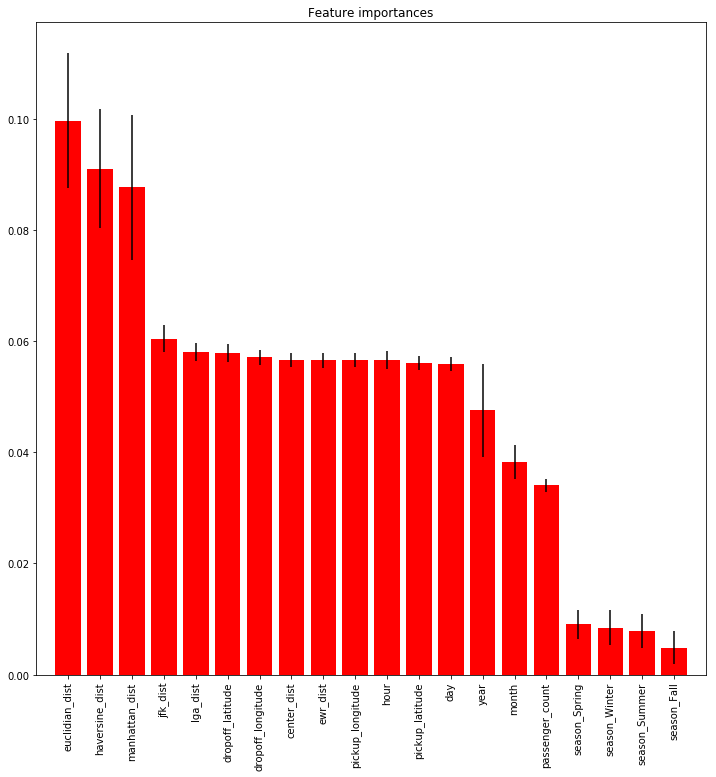

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)

forest.fit(X, y.astype('int'))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:


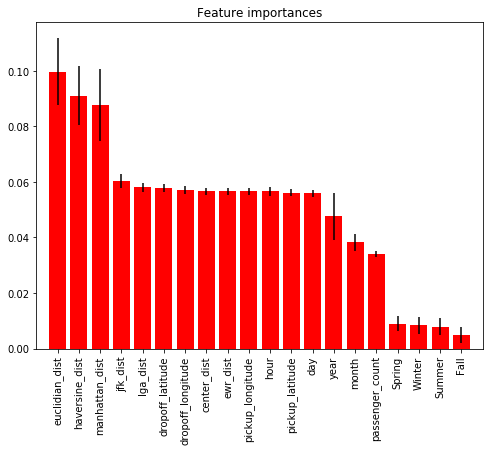

In [81]:
# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
rcParams['figure.figsize'] = (8, 6) 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['fare_amount', 'season', 'pickup_datetime', 'key'], axis=1)
dummies = pd.get_dummies(train_df['season'])

# Reset their indexes
X.reset_index(drop=True, inplace=True)
dummies.reset_index(drop=True, inplace=True)

# Join them 
X = pd.concat([X, dummies], axis = 1)



print('Before: %d' % len(X))
X = X.dropna(how = 'any', axis = 'rows')
print('After: %d' % len(X))

Before: 291029
After: 291029


# Linear Regression

In [83]:
train_df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,euclidian_dist,manhattan_dist,haversine_dist,season,center_dist,jfk_dist,ewr_dist,lga_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0.009436,0.011742,0.640041,Summer,8.185106,5.942452,17.443175,3.619856
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,0.079696,0.107481,5.247014,Winter,0.844712,13.304923,8.449358,5.772969
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,0.013674,0.019212,0.862810,Summer,2.837853,13.437328,10.485809,5.926248
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,0.025340,0.029386,1.738175,Spring,1.734038,12.608024,10.273772,6.410315
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,0.019470,0.027194,1.241354,Spring,4.339049,13.230530,12.091673,4.629331


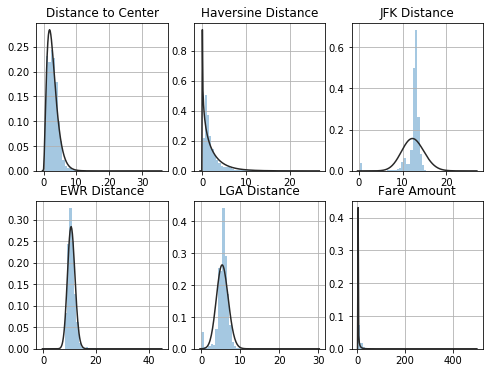

In [84]:
plt.subplot(2, 3, 1)
sns.distplot(train_df.center_dist, kde=False, fit=stats.gamma)
plt.title('Distance to Center')
plt.rcParams['axes.facecolor']='white'
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 2)
sns.distplot(train_df.haversine_dist, kde=False, fit=stats.gamma)
plt.title('Haversine Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 3)
sns.distplot(train_df.jfk_dist, kde=False, fit=stats.gamma)
plt.title('JFK Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 4)
sns.distplot(train_df.ewr_dist, kde=False, fit=stats.gamma)
plt.title('EWR Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 5)
sns.distplot(train_df.lga_dist, kde=False, fit=stats.gamma)
plt.title('LGA Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 6)
sns.distplot(train_df.fare_amount, kde=False, fit=stats.gamma)
plt.title('Fare Amount')
plt.grid(b=None)
plt.xlabel('')

plt.show()

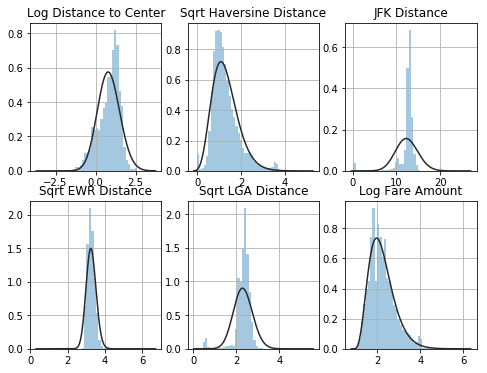

In [85]:
plt.subplot(2, 3, 1)
sns.distplot(np.log(train_df.center_dist), kde=False, fit=stats.gamma)
plt.title('Log Distance to Center')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 2)
sns.distplot((train_df.haversine_dist**.5), kde=False, fit=stats.gamma)
plt.title('Sqrt Haversine Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 3)
sns.distplot(train_df.jfk_dist, kde=False, fit=stats.gamma)
plt.title('JFK Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 4)
sns.distplot(train_df.ewr_dist**.5, kde=False, fit=stats.gamma)
plt.title('Sqrt EWR Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 5)
sns.distplot(train_df.lga_dist**.5, kde=False, fit=stats.gamma)
plt.title('Sqrt LGA Distance')
plt.grid(b=None)
plt.xlabel('')

plt.subplot(2, 3, 6)
sns.distplot(np.log(train_df.fare_amount), kde=False, fit=stats.gamma)
plt.title('Log Fare Amount')
plt.grid(b=None)
plt.xlabel('')

plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import e
from sklearn.metrics import mean_squared_error

best_X = X[['year', 'month', 'dropoff_latitude', 
            'dropoff_longitude', 'jfk_dist']]

best_X['sqrt_haversine'] = (X['haversine_dist'])**.5
best_X['sqrt_lga'] = (X['lga_dist'])**.5
best_X['log_center'] = np.log(X['center_dist'])


X_train, X_test, y_train, y_test = train_test_split(best_X, np.log(y), test_size=0.25, random_state=1)


reg = LinearRegression()
reg.fit(X_train, y_train)


# Get Predictions and Actual values
y_pred = e**reg.predict(X_test)
y_true = e**y_test

# Root Mean Squared Error
regression_rmse = mean_squared_error(y_true, y_pred, multioutput='raw_values')**.5
round(regression_rmse[0],2)


/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


4.64

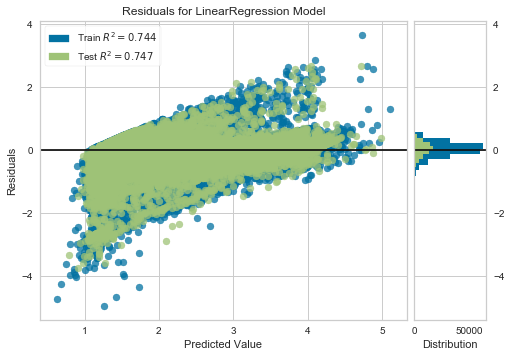

In [87]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
reg = LinearRegression()
visualizer = ResidualsPlot(reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

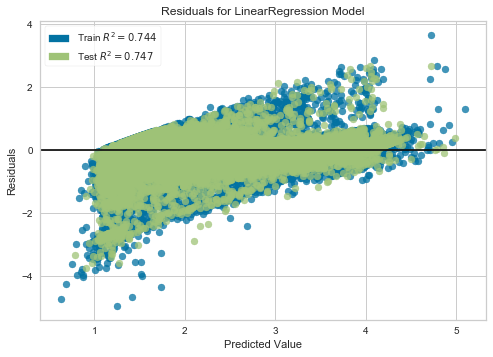

In [88]:
visualizer = ResidualsPlot(reg, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# Random Forest 

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Data Inputs
forest_X = X.drop(columns=['euclidian_dist', 'manhattan_dist'])
X_train, X_test, y_train, y_test = train_test_split(forest_X, y, test_size=0.25, random_state=1)

# Random Forest Regressor
regr_rf = RandomForestRegressor(n_estimators=100, max_depth= 30,
                                random_state=2)
# Fit
regr_rf.fit(X_train, y_train)

# Predict
y_pred = regr_rf.predict(X_test)
y_true = y_test

# RMSE
rf_rmse = mean_squared_error(y_true, y_pred, multioutput='raw_values')**.5
round(rf_rmse[0], 2)


3.63

In [151]:
#for i in range(50, 200, 25):
#    regr_rf = RandomForestRegressor(n_estimators= i, max_depth= 30, random_state=2)
#    regr_rf.fit(X_train, y_train)
#    y_pred = regr_rf.predict(X_test)
#    y_true = y_test
#    rf_rmse = mean_squared_error(y_true, y_pred, multioutput='raw_values')**.5
#    out = round(rf_rmse[0], 2)
#    print(i, out)

50 3.43
75 3.43
100 3.41
125 3.41
150 3.41
175 3.4


# XGBoost

In [160]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)


# Predict
y_pred = xgb_model.predict(X_test)
y_true = y_test

# RMSE
xgb_rmse = mean_squared_error(y_true, y_pred, multioutput='raw_values')**.5
round(xgb_rmse[0], 2)

ModuleNotFoundError: No module named 'xgboost'

# TODO 

In [35]:
# histogram of fares done 
# date column done
# time column done
# map of nyc done
# hour done
# day done
# month done 
# year done 
# manhattan distance done
# euclidian distance done 
# sns.heatmap done
# season done
# months avg fare done 
# Feature Selection Done
# Select K best DONE
# Machine Learning Feature importance done
# Correlation Matrix done
# Univariate selection just selects based on 1 feature, trees look at full subsets done
# haversine distance DONE
# Distance to center of city done
# log fares for model done
# airports done
# random forest done

